In [27]:
%matplotlib inline
import numpy as np
import pandas as pd
from causalimpact import CausalImpact

tesla = pd.read_csv("./data/Elon_Doge/tesla-data.csv")
doge_jan = pd.read_csv("./data/Elon_Doge/doge-data-1.csv")
doge_feb = pd.read_csv("./data/Elon_Doge/doge-data-2.csv")

display(tesla.head())
display(doge_jan.head())

,ticker,date,open,high,low,close,volume
0,TSLA,2020-05-01 13:30:00,754.965,762.53,754.965,762.440,786
1,TSLA,2020-05-01 13:31:00,760.050,760.05,755.320,759.200,811
2,TSLA,2020-05-01 13:32:00,758.420,759.99,756.795,759.990,854
3,TSLA,2020-05-01 13:33:00,757.960,764.85,756.220,764.850,760
4,TSLA,2020-05-01 13:34:00,766.300,772.55,765.440,771.565,3752


,ticker,baseCurrency,quoteCurrency,date,open,high,low,close,volume,volumeNotional,tradesDone,crypto,n,price
0,dogebtc,doge,btc,2021-01-27 00:00:00,2.500000e-07,2.500000e-07,2.500000e-07,2.500000e-07,10003.0,0.002501,2,Dogecoin,2,0.006694
1,dogebtc,doge,btc,2021-01-27 00:01:00,2.500000e-07,2.600000e-07,2.500000e-07,2.600000e-07,42717.0,0.011106,2,Dogecoin,2,0.006958
2,dogebtc,doge,btc,2021-01-27 00:03:00,2.600000e-07,2.600000e-07,2.600000e-07,2.600000e-07,933.0,0.000243,1,Dogecoin,2,0.006940
3,dogebtc,doge,btc,2021-01-27 00:04:00,2.600000e-07,2.600000e-07,2.600000e-07,2.600000e-07,628.0,0.000163,1,Dogecoin,2,0.006927
4,dogebtc,doge,btc,2021-01-27 00:05:00,2.500000e-07,2.600000e-07,2.500000e-07,2.600000e-07,18007.0,0.004682,2,Dogecoin,2,0.006915


In [28]:
doge_jan.loc[:,'date'] = pd.to_datetime(doge_jan.date)#.dt.tz_localize('UTC')
doge_feb.loc[:,'date'] = pd.to_datetime(doge_feb.date)#.dt.tz_localize('UTC')

In [23]:
doge_jan[['date']].head()

,date
0,2021-01-27 00:00:00+00:00
1,2021-01-27 00:01:00+00:00
2,2021-01-27 00:03:00+00:00
3,2021-01-27 00:04:00+00:00
4,2021-01-27 00:05:00+00:00


In [24]:
tweets = [
  '2021-01-28 22:47:00',
  '2021-02-04 07:29:00',
  '2021-02-04 08:15:00',
  '2021-02-04 07:57:00',
  '2021-02-04 08:27:00'
  ]
tweets = pd.to_datetime(tweets)
tweets[0]

Timestamp('2021-01-28 22:47:00')

In [72]:
def fit_model(dataset, tweet_time):
    # Getting the dogecoin and bitcoin values
    doge = dataset[dataset.crypto =='Dogecoin']
    bit = dataset[dataset.crypto == 'Bitcoin']
    time = doge.date
    tofit = doge[['price']].copy()
    tofit['bit'] = bit['price'].values
    # tofit['times'] = time.values
      
    # Getting the pre-period and post period value
    # .item() to turn numpy.int into python int
    index_val = tofit[time == tweet_time].index.values[0].item()
    pre_period = [0, index_val]
    post_period = [index_val+1, len(tofit)-1]
    
    fit = CausalImpact(
        tofit.values,
        pre_period, 
        post_period)
    return fit

In [73]:
fit_jan = fit_model(doge_jan, tweets[0])

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    0.03               51.68
Prediction (s.d.)         0.02 (0.0)         29.31 (1.67)
95% CI                    [0.02, 0.02]       [25.94, 32.49]

Absolute effect (s.d.)    0.02 (0.0)         22.37 (1.67)
95% CI                    [0.01, 0.02]       [19.18, 25.74]

Relative effect (s.d.)    76.32% (5.71%)     76.32% (5.71%)
95% CI                    [65.45%, 87.83%]   [65.45%, 87.83%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


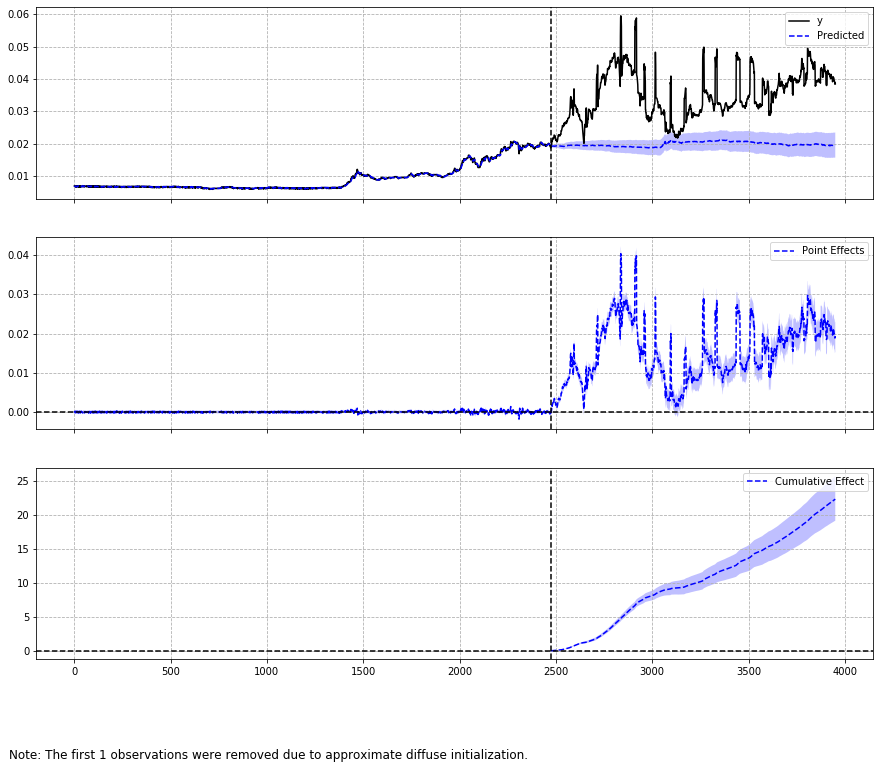

In [75]:
print(fit_jan.summary())
fit_jan.plot()

In [79]:
#dir(fit_jan)
#fit_jan.inferences
fit_jan.summary_data

,average,cumulative
actual,0.034988,51.676724
predicted,0.019843,29.307987
predicted_lower,0.017560,25.935695
predicted_upper,0.022000,32.494411
abs_effect,0.015145,22.368736
abs_effect_lower,0.012987,19.182313
abs_effect_upper,0.017428,25.741029
rel_effect,0.763230,0.763230
rel_effect_lower,0.654508,0.654508
rel_effect_upper,0.878294,0.878294


In [80]:
fit_jan.inferences

,post_cum_y,preds,post_preds,post_preds_lower,post_preds_upper,preds_lower,preds_upper,post_cum_pred,post_cum_pred_lower,post_cum_pred_upper,point_effects,point_effects_lower,point_effects_upper,post_cum_effects,post_cum_effects_lower,post_cum_effects_upper
0,NaN,0.009805,NaN,NaN,NaN,-8.372477,8.392086,NaN,NaN,NaN,-0.003110,-8.385391,8.379171,NaN,NaN,NaN
1,NaN,0.006687,NaN,NaN,NaN,0.006252,0.007122,NaN,NaN,NaN,0.000271,-0.000164,0.000706,NaN,NaN,NaN
2,NaN,0.006796,NaN,NaN,NaN,0.006413,0.007180,NaN,NaN,NaN,0.000144,-0.000240,0.000527,NaN,NaN,NaN
3,NaN,0.006829,NaN,NaN,NaN,0.006462,0.007196,NaN,NaN,NaN,0.000098,-0.000269,0.000465,NaN,NaN,NaN
4,NaN,0.006840,NaN,NaN,NaN,0.006480,0.007200,NaN,NaN,NaN,0.000075,-0.000285,0.000435,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3946,51.521830,0.019593,0.019593,0.015717,0.023468,0.015717,0.023468,29.229623,25.871547,32.403649,0.019751,0.015876,0.023627,22.292207,19.118181,25.650283
3947,51.560928,0.019599,0.019599,0.015722,0.023476,0.015722,0.023476,29.249222,25.887843,32.426280,0.019499,0.015622,0.023376,22.311706,19.134648,25.673084
3948,51.599376,0.019591,0.019591,0.015713,0.023469,0.015713,0.023469,29.268813,25.903841,32.448898,0.018857,0.014979,0.022735,22.330563,19.150478,25.695535
3949,51.638157,0.019581,0.019581,0.015702,0.023461,0.015702,0.023461,29.288394,25.919837,32.471527,0.019199,0.015320,0.023079,22.349762,19.166630,25.718320


# Repeat this for February data

In [81]:
tweets[1:]

DatetimeIndex(['2021-02-04 07:29:00', '2021-02-04 08:15:00',
               '2021-02-04 07:57:00', '2021-02-04 08:27:00'],
              dtype='datetime64[ns]', freq=None)

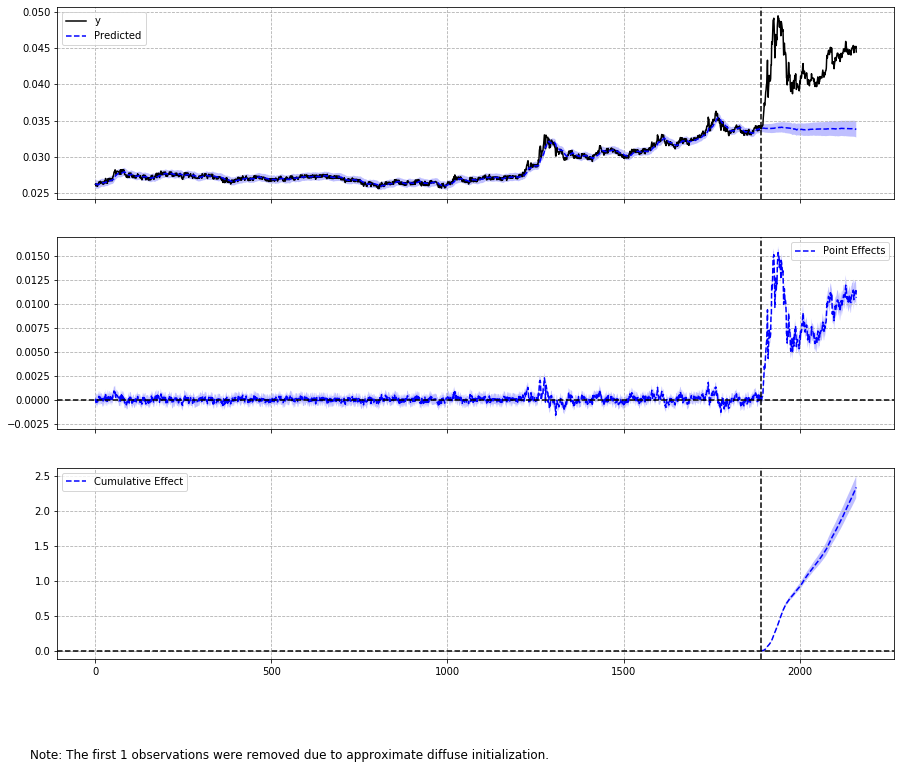

In [82]:
fit_feb = fit_model(doge_feb, tweets[1])
fit_feb.plot()

In [84]:
display(np.min(doge_feb.date), np.max(doge_feb.date))

Timestamp('2021-02-03 00:00:00')

Timestamp('2021-02-04 12:00:00')